#**Predicción de Precios de Propiedades Inmobiliarias en Colombia utilizando Redes Neuronales en Python**

# **INTRODUCCION**
>El mercado inmobiliario en Colombia ha experimentado un crecimiento significativo en los últimos años, impulsado por factores como la estabilidad económica, el aumento de la inversión extranjera y la creciente demanda de vivienda. Sin embargo, la complejidad del mercado y la influencia de múltiples variables hacen que la predicción de precios de bienes raíces sea un desafío.

>Las técnicas tradicionales de valoración, como el análisis comparativo de mercado, a menudo se basan en información limitada y pueden no capturar la dinámica completa del mercado. En este contexto, las redes neuronales, un tipo de inteligencia artificial, se presentan como una herramienta prometedora para la predicción de precios, gracias a su capacidad para aprender patrones complejos a partir de grandes volúmenes de datos

**1. PLANTEAMIENTO DEL PROBLEMA**

> La predicción precisa de precios de bienes raíces es crucial tanto para compradores como para vendedores, así como para instituciones financieras e inversionistas. La falta de herramientas precisas y confiables para la predicción de precios puede llevar a:

>Decisiones de inversión desinformadas: La incertidumbre en los precios puede desalentar la inversión en el mercado inmobiliario.
Pérdidas financieras: Tanto compradores como vendedores pueden sufrir pérdidas si no cuentan con una estimación precisa del valor de la propiedad.
Ineficiencia en el mercado: La falta de transparencia en los precios puede dificultar la negociación y la asignación eficiente de recursos.
En este proyecto, se abordará el problema de la predicción de precios de bienes raíces en Colombia mediante el desarrollo de un modelo basado en redes neuronales. El objetivo es proporcionar una herramienta precisa y confiable que permita a los usuarios estimar el valor de una propiedad a partir de sus características y la dinámica del mercado.

**2. OBJETIVO**
> Desarrollar un modelo predictivo utilizando redes neuronales para estimar el precio de bienes raíces en diversas ciudades de Colombia. El proyecto se llevará a cabo en Google Colab utilizando un dataset público de propiedades inmobiliarias colombianas, y se enfocará en la predicción de precios a partir de variables como ubicación, características de la propiedad (número de habitaciones, área, antigüedad, etc.), y otras variables económicas y demográficas.

**3. VARIABLES DEL DATASET**
>


**4.  OBJETIVO DE LA PREDICCIÓN 2024-2025**
>

**5.  METODOS DE ANÁLISIS**
>


# **EJECUTAR PROYECTO**:


# **1.IMPORTAR LIBRERIAS**

In [52]:

# Bibliotecas para manipulación y análisis de datos
import pandas as pd  # Manipulación de datos y estructuras de datos
import numpy as np  # Operaciones numéricas y manipulación de matrices

# Visualización de datos
import matplotlib.pyplot as plt  # Visualización de datos en gráficos
import seaborn as sns  # Visualización estadística basada en matplotlib

# Modelos y técnicas de Machine Learning
from sklearn.model_selection import StratifiedShuffleSplit, GridSearchCV, cross_val_score, cross_val_predict, train_test_split  # Métodos de validación y búsqueda de hiperparámetros
from sklearn.neighbors import KNeighborsClassifier  # Clasificador K-vecinos más cercanos
from sklearn.ensemble import RandomForestClassifier  # Clasificador de bosque aleatorio
from sklearn.svm import SVC  # Clasificador de máquinas de soporte vectorial
from sklearn.linear_model import Lasso, Ridge  # Regresores Lasso y Ridge
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder  # Normalización de datos y codificación de etiquetas
from sklearn.feature_selection import SelectKBest, f_classif, RFECV  # Métodos de selección de características
from sklearn.pipeline import Pipeline  # Creación de flujos de trabajo para el procesamiento y modelado
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             classification_report, confusion_matrix, mean_squared_error,
                             r2_score, mean_absolute_error, mean_absolute_percentage_error)  # Métricas de evaluación del modelo
from sklearn.compose import ColumnTransformer  # Transformaciones para diferentes columnas

# Modelos avanzados y optimización
from xgboost import XGBClassifier  # Clasificador XGBoost para optimización y rendimiento
import tensorflow as tf  # Framework para redes neuronales y Deep Learning
from tensorflow.keras.models import Sequential  # Modelos secuenciales en Keras
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization  # Capas para redes neuronales
from tensorflow.keras.preprocessing.sequence import pad_sequences  # Preprocesamiento de secuencias

# Herramientas adicionales
import statsmodels.api as sm  # Modelos estadísticos
import warnings  # Manejo de advertencias


# **2. IMPORTAR DATOS**

In [53]:

# Importar el dataset
data = pd.read_csv('/content/inmuebles_bogota.csv')

# Mostrar las primeras filas del dataset para verificar la importación
data.head()


,Tipo,Descripcion,Habitaciones,Baños,Área,Barrio,UPZ,Valor
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000
1,Casa,Casa en venta en Castilla,4,3,170,Castilla,KENNEDY: Castilla + Bavaria,$ 670.000.000
2,Apartamento,Apartamento en venta en Chico Reservado,3,3,144,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 1.120.000.000
3,Apartamento,Apartamento en venta en Usaquén,3,2,154,Usaquén,Usaquén,$ 890.000.000
4,Apartamento,Apartamento en venta en Bella Suiza,2,3,128,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,$ 970.000.000


In [54]:
data.info()  # Tipos de datos y valores faltantes
data.describe()  # Estadísticas descriptivas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Tipo          9520 non-null   object
 1   Descripcion   9520 non-null   object
 2   Habitaciones  9520 non-null   int64 
 3   Baños         9520 non-null   int64 
 4   Área          9520 non-null   int64 
 5   Barrio        9520 non-null   object
 6   UPZ           9478 non-null   object
 7   Valor         9520 non-null   object
dtypes: int64(3), object(5)
memory usage: 595.1+ KB


,Habitaciones,Baños,Área
count,9520.000000,9520.000000,9520.000000
mean,3.072479,2.447899,146.664706
std,2.049856,1.255314,1731.379622
min,1.000000,0.000000,2.000000
25%,2.000000,2.000000,57.000000
50%,3.000000,2.000000,80.000000
75%,3.000000,3.000000,135.000000
max,110.000000,9.000000,166243.000000


# **3. Análisis Univariado:**

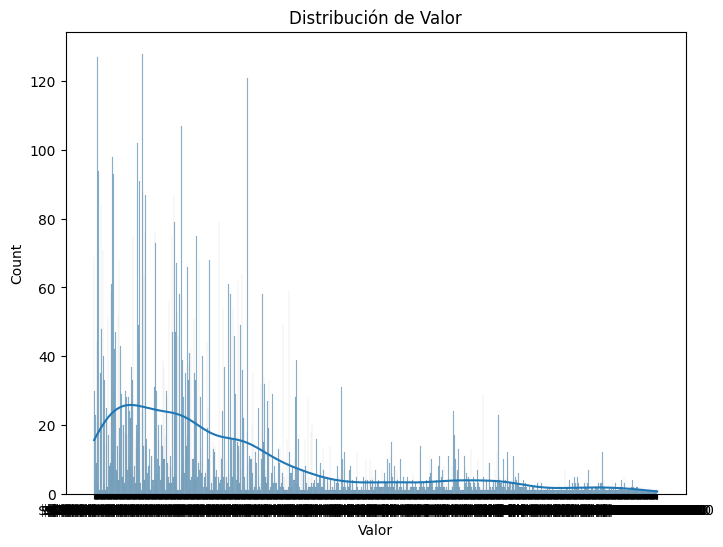

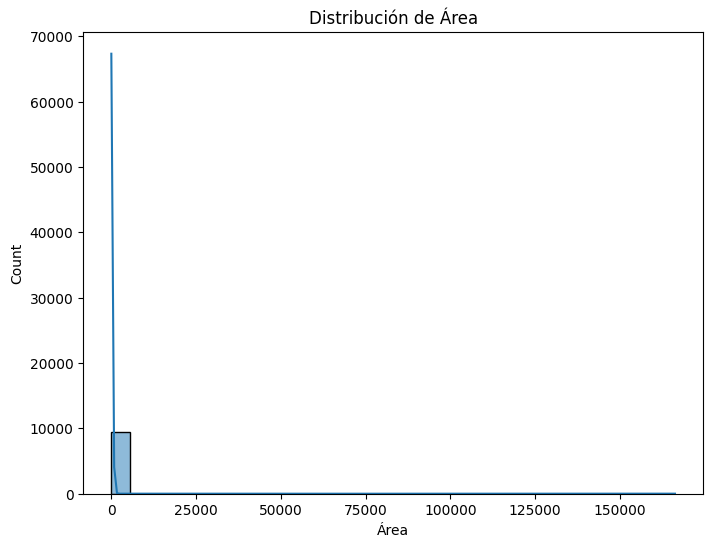

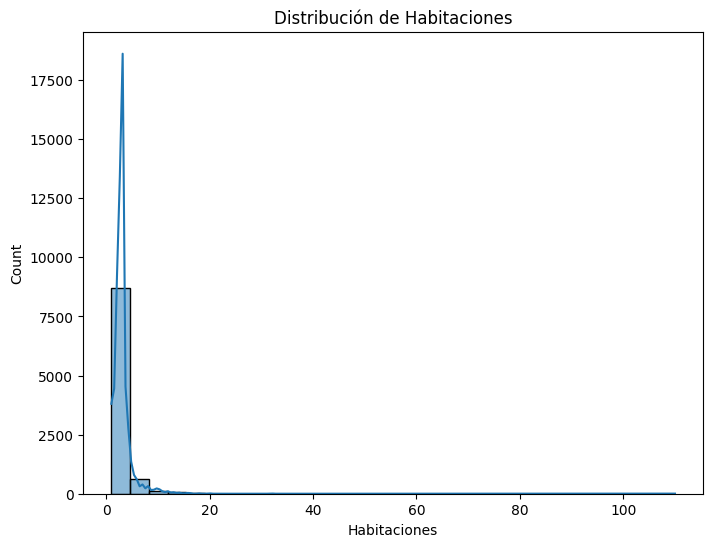

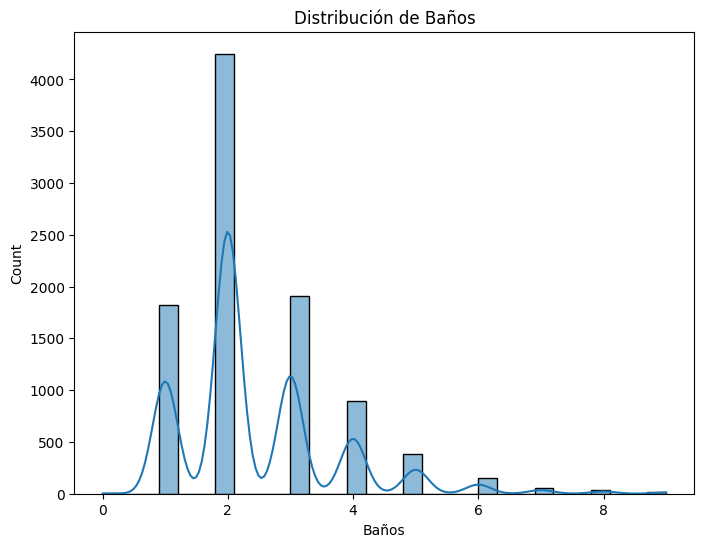

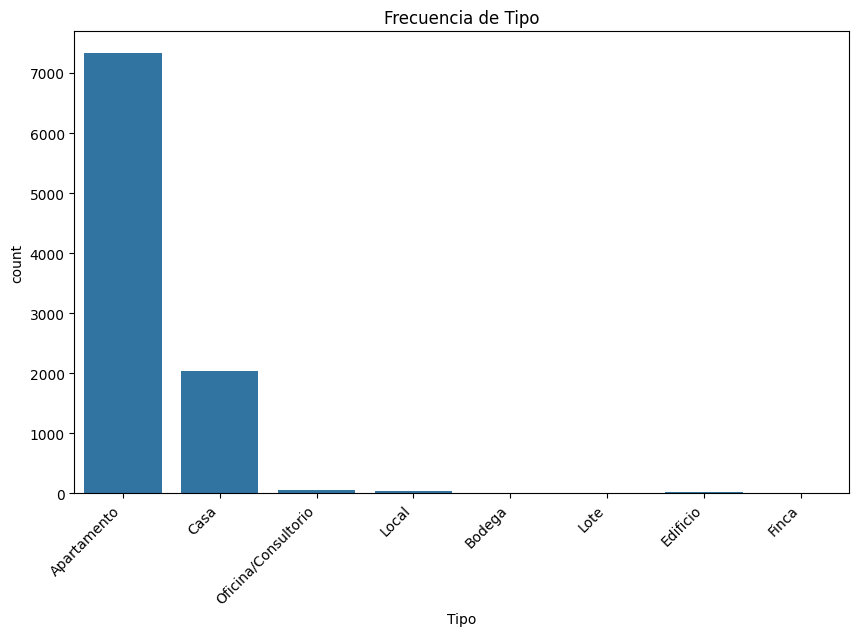

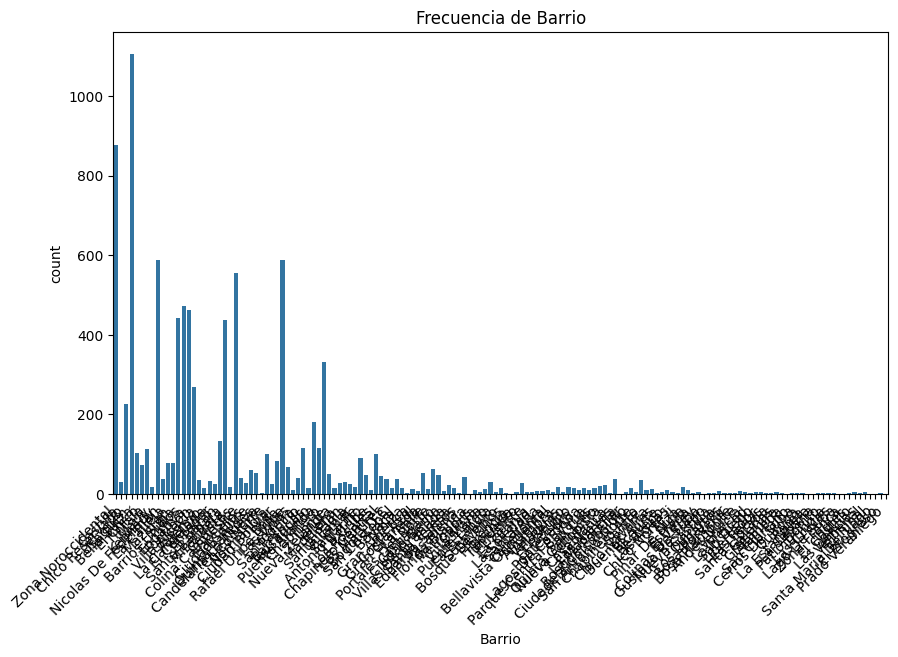

In [55]:
# Histogramas para variables numéricas
for column in ['Valor', 'Área', 'Habitaciones', 'Baños']:
    plt.figure(figsize=(8, 6))
    sns.histplot(data[column], bins=30, kde=True)
    plt.title(f'Distribución de {column}')
    plt.show()

# Gráficos de barras para variables categóricas
for column in ['Tipo', 'Barrio']:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=column, data=data)
    plt.title(f'Frecuencia de {column}')
    plt.xticks(rotation=45, ha='right')  # Rotar etiquetas del eje x para mejor legibilidad
    plt.show()

# **4. Análisis Bivariado:**

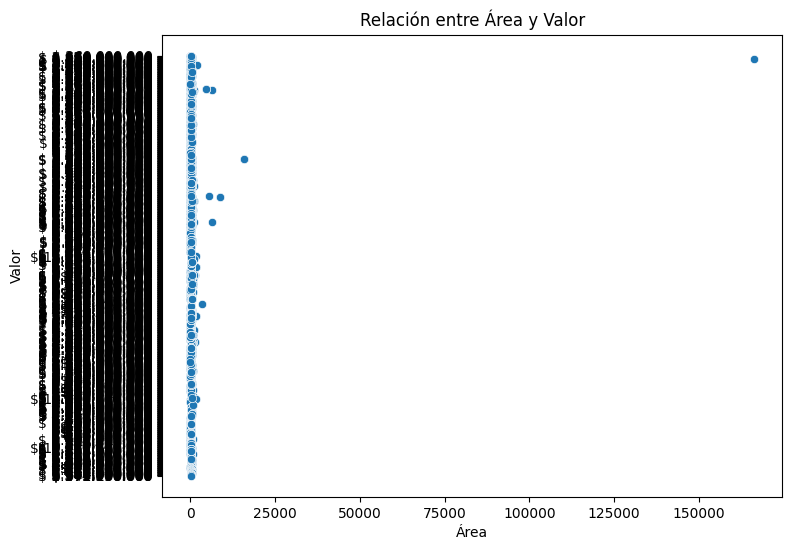

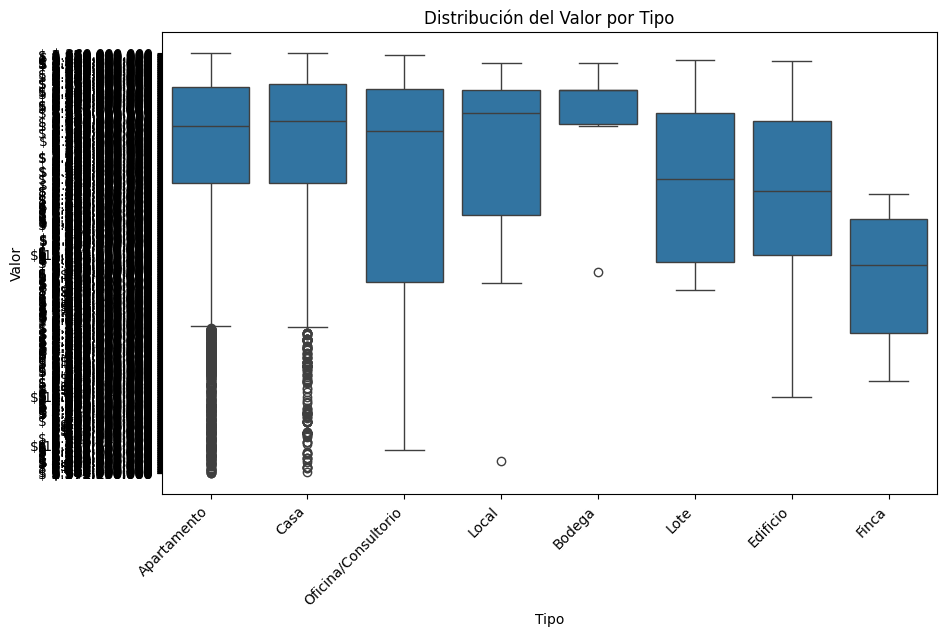

In [56]:
# Gráficos de dispersión para relaciones entre variables numéricas
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Área', y='Valor', data=data)
plt.title('Relación entre Área y Valor')
plt.show()

# Diagramas de caja para variables categóricas vs. numéricas
plt.figure(figsize=(10, 6))
sns.boxplot(x='Tipo', y='Valor', data=data)
plt.title('Distribución del Valor por Tipo')
plt.xticks(rotation=45, ha='right')
plt.show()

# **5. Manejo de Valores Faltantes (si los hay):**

In [57]:
# Verificar valores faltantes
print(data.isnull().sum())

# Imputación o eliminación según la cantidad de valores faltantes
# Ejemplo: Imputar valores faltantes en 'Area' con la media
data['Área'].fillna(data['Área'].mean(), inplace=True)

Tipo             0
Descripcion      0
Habitaciones     0
Baños            0
Área             0
Barrio           0
UPZ             42
Valor            0
dtype: int64


<ipython-input-57-586c65f82050>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Área'].fillna(data['Área'].mean(), inplace=True)


In [58]:
# Columnas a convertir
columnas_numericas = ['Valor', 'Área', 'Habitaciones', 'Baños']

# Convertir las columnas a numéricas
for columna in columnas_numericas:
  data[columna] = pd.to_numeric(data[columna], errors='coerce')
  data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Tipo          9520 non-null   object 
 1   Descripcion   9520 non-null   object 
 2   Habitaciones  9520 non-null   int64  
 3   Baños         9520 non-null   int64  
 4   Área          9520 non-null   int64  
 5   Barrio        9520 non-null   object 
 6   UPZ           9478 non-null   object 
 7   Valor         0 non-null      float64
dtypes: float64(1), int64(3), object(4)
memory usage: 595.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Tipo          9520 non-null   object 
 1   Descripcion   9520 non-null   object 
 2   Habitaciones  9520 non-null   int64  
 3   Baños         9520 non-null   int64  
 4   Área          9520 non-null   i

              Habitaciones     Baños      Área  Valor
Habitaciones      1.000000  0.484762  0.038070    NaN
Baños             0.484762  1.000000  0.059479    NaN
Área              0.038070  0.059479  1.000000    NaN
Valor                  NaN       NaN       NaN    NaN
              Habitaciones     Baños      Área  Valor
Habitaciones      1.000000  0.484762  0.038070    NaN
Baños             0.484762  1.000000  0.059479    NaN
Área              0.038070  0.059479  1.000000    NaN
Valor                  NaN       NaN       NaN    NaN


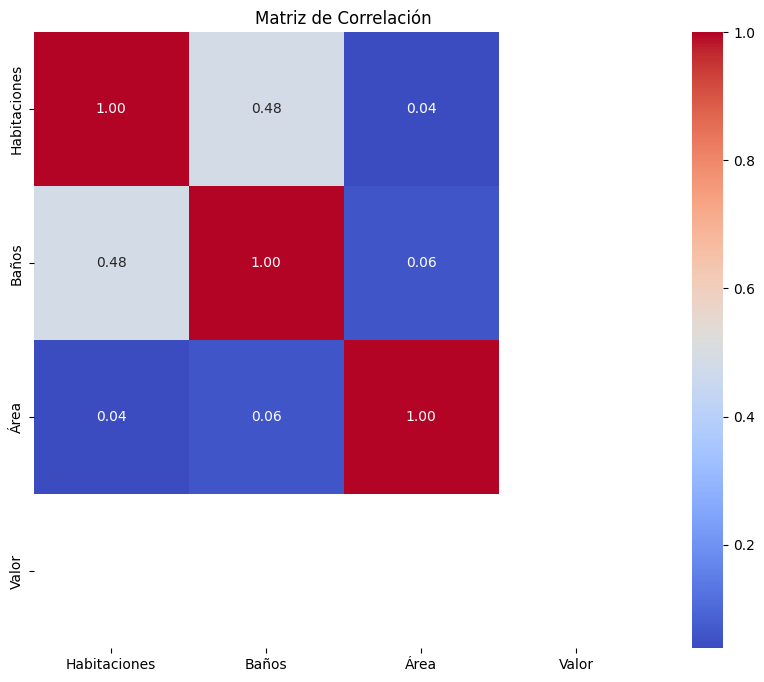

In [59]:
# Antes de calcular la matriz de correlación, selecciona solo las columnas numéricas:
numeric_data = data.select_dtypes(include=['number'])

# Calcula la matriz de correlación usando solo datos numéricos
correlation_matrix = numeric_data.corr()

# Muestra la matriz de correlación
print(correlation_matrix)

# Display the correlation matrix
print(correlation_matrix)


plt.figure(figsize=(10, 8))  # Adjust figure size if needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

In [61]:

# Encuentra las variables con mayor correlación (excluyendo la correlación consigo misma)
correlation_matrix = correlation_matrix.abs()  # Considerar valores absolutos
correlation_matrix.fillna(0, inplace=True) # Reemplazar NaN con 0

# Obtener las variables con mayor correlación (excluyendo la diagonal principal)
variables_correlacionadas = correlation_matrix[correlation_matrix > 0.5].stack().reset_index()
variables_correlacionadas = variables_correlacionadas[variables_correlacionadas['level_0'] != variables_correlacionadas['level_1']]
variables_correlacionadas = variables_correlacionadas.sort_values(by=0, ascending=False)

# Visualizar la distribución de las variables con mayor correlación
for index, row in variables_correlacionadas.iterrows():
    var1 = row['level_0']
    var2 = row['level_1']

    plt.figure(figsize=(8, 6))

    # Gráfico de dispersión
    plt.subplot(1, 2, 1)
    sns.scatterplot(x=var1, y=var2, data=data)
    plt.title(f'Relación entre {var1} y {var2}')

    # Histograma de cada variable
    plt.subplot(1, 2, 2)
    sns.histplot(data[[var1, var2]], bins=20, kde=True)  # Distribución
    plt.title(f'Distribución de {var1} y {var2}')

    plt.tight_layout()
    plt.show()